In [1]:
import sys
sys.path.append("../")

import os
os.makedirs("figures", exist_ok=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer

from utils import get_prompt
from src.utils import read_json

In [3]:
def tokenized_data(data_list: dict, tokenizer, output=True) -> tuple:
    instructions = [get_prompt(data["instruction"]) for data in data_list]
    tokenized_instructions = tokenizer(instructions, add_special_tokens=False)

    if not output:
        return tokenized_instructions, None

    outputs = [data["output"] for data in data_list]
    tokenized_outputs = tokenizer(outputs, add_special_tokens=False)
    return tokenized_instructions, tokenized_outputs


def visulize_length_dist(data, title):
    plt.hist(data, bins=80)
    plt.title(title)
    plt.xlabel("Length of sentence")
    plt.ylabel("Number of data")
    plt.xlim([0, 1000])
    plt.grid(alpha=0.3)

    Q0 = np.percentile(data, 0)
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)
    Q4 = np.percentile(data, 100)
    
    # Adding vertical lines for Q0, Q1, Q2, Q3, Q4
    plt.axvline(Q0, linestyle="dashed", linewidth=1, color="purple")
    plt.axvline(Q1, linestyle="dashed", linewidth=1, color="r")
    plt.axvline(Q2, linestyle="dashed", linewidth=1, color="g")
    plt.axvline(Q3, linestyle="dashed", linewidth=1, color="b")
    plt.axvline(Q4, linestyle="dashed", linewidth=1, color="orange")
    
    # Adding text labels for Q0, Q1, Q2, Q3, Q4
    plt.legend([f"Q0: {Q0:.0f}", f"Q1: {Q1:.0f}", f"Q2: {Q2:.0f}", f"Q3: {Q3:.0f}", f"Q4: {Q4:.0f}"], loc="upper right")
    
    ax = plt.gca()
    ax.patch.set_alpha(0)
    ax.spines[["right", "top"]].set_visible(False)
    return

In [4]:
base_model_path = "../pretrain/Taiwan-LLM-7B-v2.0-chat"
train_data_path = "../data/train.json"
public_data_path = "../data/public_test.json"
private_data_path = "../data/private_test.json"

In [5]:
train_data_list = read_json(train_data_path)
public_data_list = read_json(public_data_path)
private_data_list = read_json(private_data_path)

In [6]:
data = train_data_list[0]
print(data)
print(get_prompt(data["instruction"]))

{'id': 'db63fb72-e211-4596-94a4-69617706f7ef', 'instruction': '翻譯成文言文：\n雅裏惱怒地說： 從前在福山田獵時，你誣陷獵官，現在又說這種話。\n答案：', 'output': '雅裏怒曰： 昔畋於福山，卿誣獵官，今復有此言。'}
你是人工智慧助理，以下是用戶和人工智能助理之間的對話。你要對用戶的問題提供有用、安全、詳細和禮貌的回答。以下的問題為文言文翻譯成白話文或白話文翻譯成文言文。USER: 翻譯成文言文：
雅裏惱怒地說： 從前在福山田獵時，你誣陷獵官，現在又說這種話。
答案： ASSISTANT:


In [7]:
tokenizer = AutoTokenizer.from_pretrained(base_model_path)
tokenized_train_instructions, tokenized_train_outputs = tokenized_data(train_data_list, tokenizer)
tokenized_public_instructions, tokenized_public_outputs = tokenized_data(public_data_list, tokenizer)
tokenized_private_instructions, _ = tokenized_data(private_data_list, tokenizer, output=False)

## Training dataset

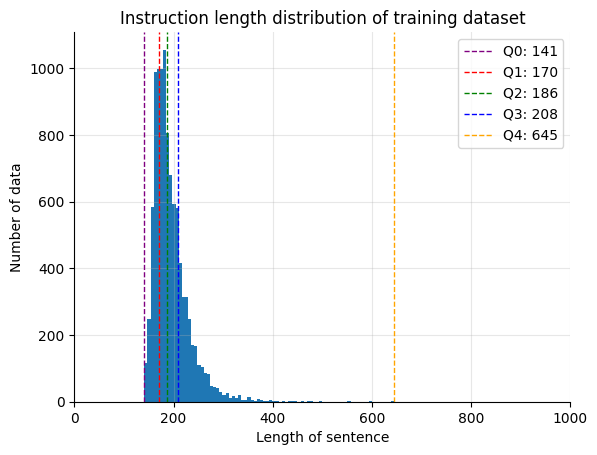

In [8]:
train_instruction_lengths = np.array([
    len(tokenized_train_instructions["input_ids"][i])
    for i in range(len(train_data_list))
])
visulize_length_dist(train_instruction_lengths, title="Instruction length distribution of training dataset")
plt.savefig("figures/train_instruction_length.png")

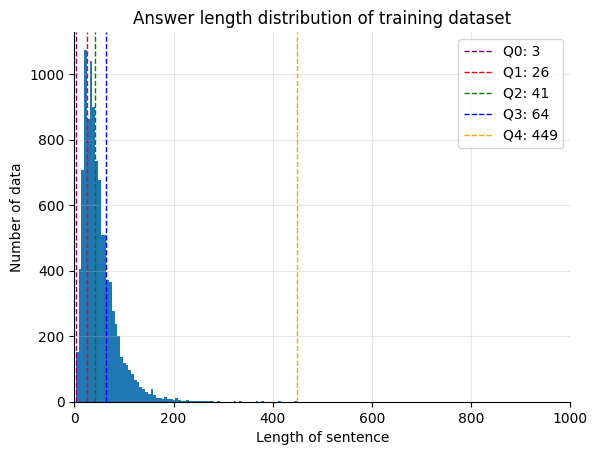

In [9]:
train_output_lengths = np.array([
    len(tokenized_train_outputs["input_ids"][i])
    for i in range(len(train_data_list))
])
visulize_length_dist(train_output_lengths, title="Answer length distribution of training dataset")
plt.savefig("figures/train_answer_length.png")

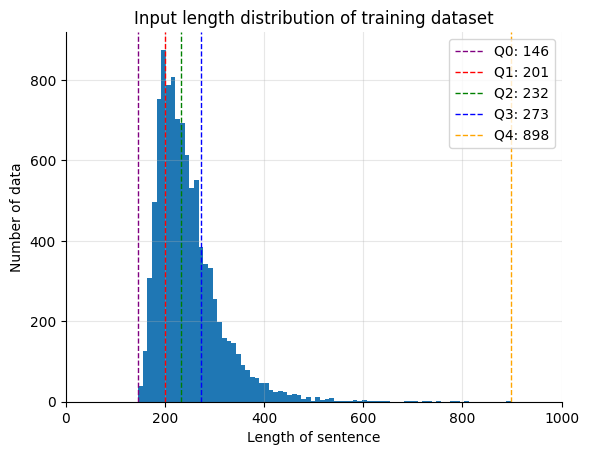

In [10]:
train_input_lengths = np.array([
    len(tokenized_train_instructions["input_ids"][i]) + len(tokenized_train_outputs["input_ids"][i]) + 2
    for i in range(len(train_data_list))
])
visulize_length_dist(train_input_lengths, title="Input length distribution of training dataset")
plt.savefig("figures/train_input_length.png")

## Public dataset

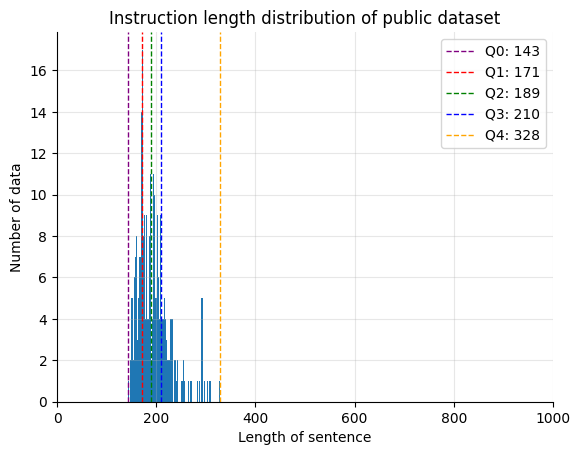

In [11]:
public_instruction_lengths = np.array([
    len(tokenized_public_instructions["input_ids"][i])
    for i in range(len(public_data_list))
])
visulize_length_dist(public_instruction_lengths, title="Instruction length distribution of public dataset")
plt.savefig("figures/public_instruction_length.png")

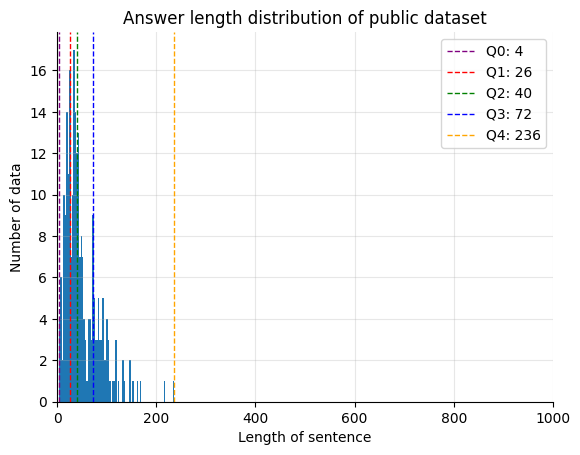

In [12]:
public_output_lengths = np.array([
    len(tokenized_public_outputs["input_ids"][i])
    for i in range(len(public_data_list))
])
visulize_length_dist(public_output_lengths, title="Answer length distribution of public dataset")
plt.savefig("figures/public_answer_length.png")

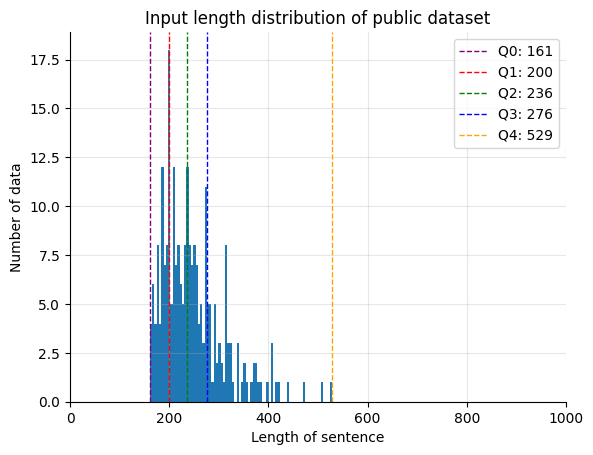

In [13]:
public_input_lengths = np.array([
    len(tokenized_public_instructions["input_ids"][i]) + len(tokenized_public_outputs["input_ids"][i]) + 2
    for i in range(len(public_data_list))
])
visulize_length_dist(public_input_lengths, title="Input length distribution of public dataset")
plt.savefig("figures/public_input_length.png")

## Private dataset

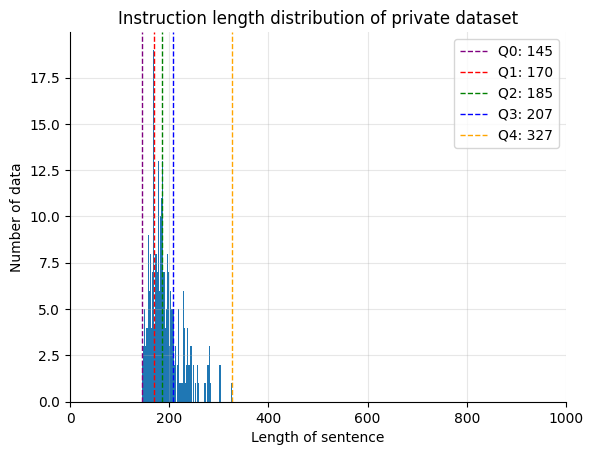

In [14]:
private_input_lengths = np.array([
    len(tokenized_private_instructions["input_ids"][i])
    for i in range(len(private_data_list))
])
visulize_length_dist(private_input_lengths, title="Instruction length distribution of private dataset")
plt.savefig("figures/private_input_length.png")